1. What is the best month from sales perspective?
2. What is the best month from profit perspective?
3. What is the best season from sales perspective?
4. What is the best season from profit perspctive?
5. What is the most common and the most rare shipping method?
6. What is the region with the highest and the lowest sales/profit?
7. What is the city with the highest and the lowest sales/profit?
8. What is the state with the highest and lowest sales/profit?
9. What is the best category considering sales/profit?
10. What is the best sub-category considering sales/profit?
11. What is the product with the highest and lowest sales/profit?
12. Invstigate the difference between product name and product ID population.
13. What is the customer with the highets and lowest sales/profit?
14. What is the customer with the highest and lowest discount?
15. What is the customer with the highest and lowest orders in product quantity?
16. Explore the correlation between the best customer sales/profit and and custmer with highewst/lowest diccount.
17. What did the best customer favourite product?
18. How much much discount did the best customer get?
19. What is the customer with the most frequent purchases?
20. Which are the products that were sold together the most?

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

In [2]:
""" Visualisation Parameters """
vis_label = {
    "fontsize":15,
    "fontstyle":"oblique",  # or normal, italic
    "fontweight":"demi",    # or bold, semibold, demibold, bold, extra bold, heavy, roman, light, ultralight
    "backgroundcolor":"white",
    "color":"black" 
}

In [3]:
cols_in_interest = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Lifeboat"]
colours = ["#C4D600", "#046A38", "#62B5E5", "#0076A8", "#012169", "#75787B"]

In [4]:
df = pd.read_excel(os.path.join("..", "data", "Sales.xls"))
df.drop(columns=["Row ID"], inplace=True)

In [5]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
# df.dtypes

In [7]:
df.insert(2, "Month", df["Order Date"].dt.month)

In [8]:
df.insert(3, "Season", np.nan)

In [9]:
df.insert(4, "Year", df["Order Date"].dt.year)

In [10]:
def get_month_number(month_name):
    datetime_object = datetime.strptime(month_name, "%B")
    return datetime_object.month

In [11]:
def identify_season(month):
    if get_month_number("March") <= month <= get_month_number("May"):
        season = "Spring"
    elif get_month_number("June") <= month <= get_month_number("August"):
        season = "Summer"
    elif get_month_number("September") <= month <= get_month_number("November"):
        season = "Autumn"
    elif month == get_month_number("December") or month <= get_month_number("February"):
        season = "Winter"
    return season

In [12]:
df["Season"] = df.apply(lambda row:
                        identify_season(row[f"Month"]),
                        axis=1
                       )

In [13]:
df.head()

,Order ID,Order Date,Month,Season,Year,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,11,Autumn,2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,11,Autumn,2016,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,6,Summer,2016,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,10,Autumn,2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,10,Autumn,2015,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Q1

In [13]:
sp_df = df[["Month", "Year", "Sales", "Profit"]]  # sp for sales_profit
# sales_profit_df

In [14]:
sp_df_group = sp_df.groupby(by=["Year", "Month"]).sum()

In [15]:
sp_df_group

Sales      Profit
Year Month                         
2014 1       14236.8950   2450.1907
     2        4519.8920    862.3084
     3       55691.0090    498.7299
     4       28295.3450   3488.8352
     5       23648.2870   2738.7096
     6       34595.1276   4976.5244
     7       33946.3930   -841.4826
     8       27909.4685   5318.1050
     9       81777.3508   8328.0994
     10      31453.3930   3448.2573
     11      78628.7167   9292.1269
     12      69545.6205   8983.5699
2015 1       18174.0756  -3281.0070
     2       11951.4110   2813.8508
     3       38726.2520   9732.0978
     4       34195.2085   4187.4962
     5       30131.6865   4667.8690
     6       24797.2920   3335.5572
     7       28765.3250   3288.6483
     8       36898.3322   5355.8084
     9       64595.9180   8209.1627
     10      31404.9235   2817.3660
     11      75972.5635  12474.7884
     12      74919.5212   8016.9659
2016 1       18542.4910   2824.8233
     2       22978.8150   5004.5795
     3       51715.8750   3611.9680
     4       38750.0390   2977.8149
     5       56987.7280   8662.1464
     6       40344.5340   4750.3781
     7       39261.9630   4432.8779
     8       31115.3743   2062.0693
     9       73410.0249   9328.6576
     10      59687.7450  16243.1425
     11      79411.9658   4011.4075
     12      96999.0430  17885.3093
2017 1       43971.3740   7140.4391
     2       20301.1334   1613.8720
     3       58872.3528  14751.8915
     4       36521.5361    933.2900
     5       44261.1102   6342.5828
     6       52981.7257   8223.3357
     7       45264.4160   6952.6212
     8       63120.8880   9040.9557
     9       87866.6520  10991.5556
     10      77776.9232   9275.2755
     11     118447.8250   9690.1037
     12      83829.3188   8483.3468

In [31]:
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0)

fig.append_trace(go.Bar(
    name='sales 2014',
    x=sp_df_group.loc[2014, "Sales"],
    y=sp_df_group.loc[2014, "Sales"].index,
    
#                      text=df["Male"].map('{:,.0f}'.format), #Display the numbers with thousands separators in hover-over tooltip 
    textposition='inside',
    orientation='h', 
    width=0.7, 
    showlegend=True, 
    marker_color='#046A38'), 
    1, 1) # 1,1 represents row 1 column 1 in the plot grid

fig.append_trace(go.Bar(
    name='sales 2015', 
    x=sp_df_group.loc[2015, "Sales"], 
    y=sp_df_group.loc[2015, "Sales"].index,
    orientation='h',
    width=0.7,
    showlegend=True, 
    marker_color='#0076A8'
),
    1, 1)

fig.append_trace(go.Bar(
    name='sales 2016', 
    x=sp_df_group.loc[2016, "Sales"], 
    y=sp_df_group.loc[2016, "Sales"].index,
    orientation='h',
    width=0.7,
    showlegend=True, 
    marker_color='red'
),
    1, 1)


fig.append_trace(go.Bar(
    name='profit 2014',
    x=sp_df_group.loc[2014, "Profit"],
    y=sp_df_group.loc[2014, "Profit"].index,
    
#                      text=df["Male"].map('{:,.0f}'.format), #Display the numbers with thousands separators in hover-over tooltip 
    textposition='inside',
    orientation='h', 
    width=0.7, 
    showlegend=True, 
    marker_color='#43B02A'), 
    1, 2) # 1,1 represents row 1 column 1 in the plot grid

fig.show()

In [30]:
fig.update_layout(title =  "XboxOne World Sales (MM) ",
                  barmode = 'group', title_font_size = 40,
                  width = 1600, height = 1400)

In [26]:
fig.update_xaxes(showticklabels=True,title_text="Sales", row=1, col=1)
fig.update_xaxes(showticklabels=True,title_text="Profit", row=1, col=2)

fig.update_layout(title_text="Industry Employment Counts by Gender (Q1 2021)", 
                  width=800, 
                  height=700,
                  title_x=0.9,
                  xaxis1={'side': 'top'},
                  xaxis2={'side': 'top'})

fig.show()

In [106]:
""" Plot Total Sales & Profit per Month per Year"""
fig = go.Figure()

# Prepare traces
y2014_sales = go.Bar(
    name='sales 2014', 
    y=sp_df_group.loc[2014, "Sales"].index, 
    x=sp_df_group.loc[2014, "Sales"],
    orientation='h',
    opacity=0.8,
    offsetgroup=0
)

y2014_profit = go.Bar(
    name='profit 2014', 
    y=sp_df_group.loc[2014, "Profit"].index, 
    x=sp_df_group.loc[2014, "Profit"],
    orientation='h',
    opacity=0.8,
    offsetgroup=0
)

y2015_sales = go.Bar(
    name='sales 2015', 
    x=sp_df_group.loc[2015, "Sales"].index, 
    y=sp_df_group.loc[2015, "Sales"],
    opacity=0.8,
    offsetgroup=1
)

y2015_profit = go.Bar(
    name='profit 2015', 
    x=sp_df_group.loc[2015, "Profit"].index, 
    y=sp_df_group.loc[2015, "Profit"],
    opacity=0.8,
    offsetgroup=1
)

y2016_sales = go.Bar(
    name='sales 2016', 
    x=sp_df_group.loc[2016, "Sales"].index, 
    y=sp_df_group.loc[2016, "Sales"],
    opacity=0.8,
    offsetgroup=2
)

y2016_profit = go.Bar(
    name='profit 2016', 
    x=sp_df_group.loc[2016, "Profit"].index, 
    y=sp_df_group.loc[2016, "Profit"],
    opacity=0.8,
    offsetgroup=2
)

y2017_sales = go.Bar(
    name='sales 2017', 
    x=sp_df_group.loc[2017, "Sales"].index, 
    y=sp_df_group.loc[2017, "Sales"],
    opacity=0.8,
    offsetgroup=3
)

y2017_profit = go.Bar(
    name='profit 2016', 
    x=sp_df_group.loc[2017, "Profit"].index, 
    y=sp_df_group.loc[2017, "Profit"],
    opacity=0.8,
    offsetgroup=3
)



# Prepare layout
fig.update_layout(
    title="Sales VS Profit",
    xaxis_title="Months",
    yaxis_title="amount (£)",
#     barmode="stack"
    xaxis = dict(
            tickmode = "array",
            tickvals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)


# Create figure
fig = go.Figure(
    data=[y2014_sales,
          y2014_profit,
#           y2015_sales,
#           y2015_profit,
#           y2016_sales,
#           y2016_profit,
#           y2017_sales,
#           y2017_profit
         ], 
    layout=layout
)

# Show figure
pyo.plot(fig)

'temp-plot.html'

### Weekly resolution of Sales and Profit

In [6]:
""" Prepare dataframe for Sales & Profit analysis """
sp_cols_in_interest = ["Order Date", "Sales", "Profit"]

df_sp = df.copy()

# Drop all other than cols in interest
[df_sp.drop(columns=[col], inplace=True) for col in df_sp.columns if col not in sp_cols_in_interest]

# convert to dattime type
df_sp["Order Date"] = pd.to_datetime(df_sp["Order Date"])

# set Order date as index
df_sp.set_index(keys="Order Date", inplace=True, drop=True)

df_sp.head()

,Sales,Profit
Order Date,,
2016-11-08,261.9600,41.9136
2016-11-08,731.9400,219.5820
2016-06-12,14.6200,6.8714
2015-10-11,957.5775,-383.0310
2015-10-11,22.3680,2.5164


In [7]:
""" Resample data weekly """
weekly_df = df_sp.resample("W").sum()
weekly_df.reset_index(inplace=True)
weekly_df.rename(columns={"Order Date": "order_date", "Sales": "sales_weekly", "Profit": "profit_weekly"}, inplace=True)
weekly_df

,order_date,sales_weekly,profit_weekly
0,2014-01-05,324.0440,-55.5549
1,2014-01-12,4599.5720,1322.7434
2,2014-01-19,4509.1270,398.8863
3,2014-01-26,3842.3880,758.0377
4,2014-02-02,1642.3100,239.5467
...,...,...,...
204,2017-12-03,32354.5700,2081.8161
205,2017-12-10,24006.9580,1099.1676
206,2017-12-17,10495.9630,758.9628
207,2017-12-24,23662.3640,4245.4893


In [8]:
monthly_df = df_sp.resample("M").sum()
monthly_df.reset_index(inplace=True)
monthly_df.rename(columns={"Order Date": "order_date", "Sales": "sales_monthly", "Profit": "profit_monthly"}, inplace=True)
monthly_df

,order_date,sales_monthly,profit_monthly
0,2014-01-31,14236.8950,2450.1907
1,2014-02-28,4519.8920,862.3084
2,2014-03-31,55691.0090,498.7299
3,2014-04-30,28295.3450,3488.8352
4,2014-05-31,23648.2870,2738.7096
5,2014-06-30,34595.1276,4976.5244
6,2014-07-31,33946.3930,-841.4826
7,2014-08-31,27909.4685,5318.1050
8,2014-09-30,81777.3508,8328.0994
9,2014-10-31,31453.3930,3448.2573


In [9]:
merged_df = pd.merge_asof(
    weekly_df,
    monthly_df,
    on="order_date",
    direction="forward",
    tolerance=pd.Timedelta(days=6)
)

In [10]:
merged_df.head(20)

,order_date,sales_weekly,profit_weekly,sales_monthly,profit_monthly
0,2014-01-05,324.044,-55.5549,NaN,NaN
1,2014-01-12,4599.572,1322.7434,NaN,NaN
2,2014-01-19,4509.127,398.8863,NaN,NaN
3,2014-01-26,3842.388,758.0377,14236.895,2450.1907
4,2014-02-02,1642.310,239.5467,NaN,NaN
5,2014-02-09,756.888,224.0695,NaN,NaN
6,2014-02-16,2780.094,380.9619,NaN,NaN
7,2014-02-23,227.236,21.6144,4519.892,862.3084
8,2014-03-02,2480.663,-130.7561,NaN,NaN
9,2014-03-09,3982.968,-214.3771,NaN,NaN


In [12]:
merged_df.fillna(method="backfill", inplace=True)
merged_df.head(20)

,order_date,sales_weekly,profit_weekly,sales_monthly,profit_monthly
0,2014-01-05,324.044,-55.5549,14236.895,2450.1907
1,2014-01-12,4599.572,1322.7434,14236.895,2450.1907
2,2014-01-19,4509.127,398.8863,14236.895,2450.1907
3,2014-01-26,3842.388,758.0377,14236.895,2450.1907
4,2014-02-02,1642.310,239.5467,4519.892,862.3084
5,2014-02-09,756.888,224.0695,4519.892,862.3084
6,2014-02-16,2780.094,380.9619,4519.892,862.3084
7,2014-02-23,227.236,21.6144,4519.892,862.3084
8,2014-03-02,2480.663,-130.7561,55691.009,498.7299
9,2014-03-09,3982.968,-214.3771,55691.009,498.7299


In [16]:
""" Plot Sales & Profit """

# Prepare traces
weekly_sales_trace = go.Scatter(
    x=merged_df.order_date, 
    y=merged_df.sales_weekly,
    name="weekly sales",
    mode='markers',
    marker_color=colours[0]
)

weekly_profit_trace = go.Line(
    x=merged_df.order_date, 
    y=merged_df.profit_weekly,
    name="weekly profit",
    marker_color=colours[1]
)

monthly_sales_trace = go.Line(
    x=merged_df.order_date,
    y=merged_df.sales_monthly,
    name="monthy sales",
    marker_color=colours[2]
)

monthly_profit_trace = go.Line(
    x=merged_df.order_date,
    y=merged_df.profit_monthly,
    name="monthly profit",
    marker_color=colours[3]
)

# Prepare layout
layout = go.Layout(
    title="Sales VS Profit",
    xaxis_title="Weekly dates",
    yaxis_title="amount (£)"
)

# Create figure
fig = go.Figure(
    data=[weekly_sales_trace, 
#           weekly_profit_trace, 
#           monthly_sales_trace, 
#           monthly_profit_trace
         ], 
    layout=layout
)

# Show figure
pyo.plot(fig)

'temp-plot.html'

## Histogram matplotlib

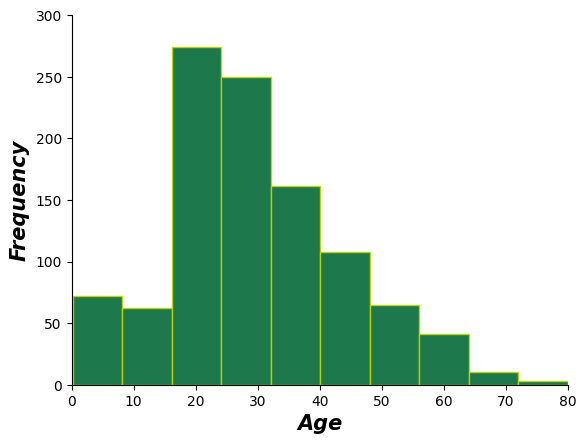

In [105]:
fig, ax = plt.subplots()
_, _, bar_container = ax.hist(
    df["Age"].dropna(), 
    lw=1,
    edgecolor="#C4D600", 
    facecolor="#046A38", 
    alpha=0.9,
#     width=6,
    align='mid',
    joinstyle="round"
)

ax.set_ylim(bottom=0, top=300)  # set safe limit to ensure that all data is visible.
ax.set_xlim(left=0, right=80)  # set safe limit to ensure that all data is visible.

ax.set_ylabel(
    ylabel="Frequency", 
    fontsize=vis_label["fontsize"],
    fontstyle=vis_label["fontstyle"], 
    fontweight=vis_label["fontweight"],
    backgroundcolor=vis_label["backgroundcolor"],
    color=vis_label["color"]    
)

ax.set_xlabel(
    xlabel="Age", 
    fontsize=vis_label["fontsize"],
    fontstyle=vis_label["fontstyle"], 
    fontweight=vis_label["fontweight"],
    backgroundcolor=vis_label["backgroundcolor"],
    color=vis_label["color"]  

)

# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.show()

## Histogram plotly

In [2]:
df_sales = pd.read_excel(os.path.join("..", "data", "Sales.xls"))

In [26]:
df_sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [42]:
sales = go.Histogram(
    x = df_sales["Sales"],
    name = "Sales",
#     opacity=0.5,
    xbins=dict(
        start=-1000,
        end=1000,
        size=50
    ),
#     nbinsx=200,
    marker_color='#C4D600',
    histfunc="sum"
)

profit = go.Histogram(
    x = df_sales["Profit"],
    name = "Profit",
    xbins=dict( # bins used for histogram
        start=-1000,
        end=1000,
        size=50),
#     opacity=0.5,
    histfunc="sum"
)

In [43]:
data = [sales, profit]
layout = go.Layout(
    title="Sales VS Profit",
    xaxis_title='Sales & Profit',
    bargap=0.2,
    bargroupgap=0.1
)

# fig.update_layout(
#     title_text='Sampled Results', # title of plot
#     xaxis_title_text='Value', # xaxis label
#     yaxis_title_text='Count', # yaxis label
#     bargap=0.2, # gap between bars of adjacent location coordinates
#     bargroupgap=0.1 # gap between bars of the same location coordinates
# )

In [44]:
fig = go.Figure(data=data, layout=layout)

In [1]:
pyo.plot(fig)

NameError: name 'pyo' is not defined